In [1]:
import json 
import os
import pandas as pd
import shutil
import matplotlib.pyplot as plt
import seaborn as sns

#### Identify all invalid json files

In [ ]:
'''
folder_path_output = r"C:\Users\mahu123a\Documents\Data_Classifier_Old\2_CVRP_instances_many_instances\classifier"
folder_path_safety = r"C:\Users\mahu123a\Documents\3l-cvrp-classifier-work\data\input\3l-cvrp\test_input_safety_copy"
folder_path_valid = r"c:\Users\mahu123a\Documents\3l-cvrp-classifier-work\data\input\3l-cvrp\test_input"

# Ensure the destination folder exists
os.makedirs(folder_path_valid, exist_ok=True)

# Loop through all files in the output folder
for filename in os.listdir(folder_path_output):
    if filename.endswith(".json"):
        file_path_output = os.path.join(folder_path_output, filename)
        try:
            with open(file_path_output, "r", encoding="utf-8") as f:
                data = json.load(f)

                # Check if "CP Status" is "Invalid"
                if data.get("CP Status") == "Invalid":
                    filename_input = data.get("Name") + ".json"
                    file_path_safety_input = os.path.join(folder_path_safety, filename_input)
                    file_path_valid_output = os.path.join(folder_path_valid, filename_input)

                    # Copy from safety folder to valid folder
                    shutil.copy(file_path_safety_input, file_path_valid_output)
        except Exception as e:
            print(f"Fehler beim Verarbeiten von {filename}: {e}")
'''


SyntaxError: incomplete input (3161286405.py, line 26)

#### Copy all non executed inputs files in extra folder

In [ ]:
'''
# Define the folder paths
folder_path_output = r"C:\Users\mahu123a\Documents\3l-cvrp-classifier-work\data\output\classifier"
folder_path_safety = r"C:\Users\mahu123a\Documents\3l-cvrp-classifier-work\data\input\3l-cvrp\test_input_safety_copy"
folder_path_valid = r"C:\Users\mahu123a\Documents\3l-cvrp-classifier-work\data\input\3l-cvrp\test_input"

# Step 1: Load 'Name' values from output JSON files
executed_names = set()
for filename in os.listdir(folder_path_output):
    if filename.endswith(".json"):
        with open(os.path.join(folder_path_output, filename), 'r') as f:
            data = json.load(f)
            name = data.get("Name")
            if name:
                executed_names.add(name)

# Step 2: Compare with safety files and copy unmatched to valid
for filename in os.listdir(folder_path_safety):
    if filename.endswith(".json"):
        full_path = os.path.join(folder_path_safety, filename)
        with open(full_path, 'r') as f:
            data = json.load(f)
            name = data.get("Name")
            if name and name not in executed_names:
                shutil.copy(full_path, os.path.join(folder_path_valid, filename))
                print(f"Copied: {filename}")

print("Done!")

'''

Copied: 038_n020_m200_bt10_14_13_060425.json
Copied: 038_n020_m200_bt10_14_1_060425.json
Copied: 038_n020_m200_bt10_14_2_060425.json
Copied: 038_n020_m200_bt10_14_3_060425.json
Copied: 038_n020_m200_bt10_14_4_060425.json
Copied: 038_n020_m200_bt10_14_5_060425.json
Copied: 038_n020_m200_bt10_14_6_060425.json
Copied: 038_n020_m200_bt10_14_7_060425.json
Copied: 038_n020_m200_bt10_14_8_060425.json
Copied: 038_n020_m200_bt10_14_9_060425.json
Copied: 038_n020_m200_bt10_15_0_060425.json
Copied: 038_n020_m200_bt10_15_10_060425.json
Copied: 038_n020_m200_bt10_15_11_060425.json
Copied: 038_n020_m200_bt10_15_12_060425.json
Copied: 038_n020_m200_bt10_15_13_060425.json
Copied: 038_n020_m200_bt10_15_14_060425.json
Copied: 038_n020_m200_bt10_15_1_060425.json
Copied: 038_n020_m200_bt10_15_2_060425.json
Copied: 038_n020_m200_bt10_15_3_060425.json
Copied: 038_n020_m200_bt10_15_4_060425.json
Copied: 038_n020_m200_bt10_15_5_060425.json
Copied: 038_n020_m200_bt10_15_6_060425.json
Copied: 038_n020_m200_bt10

In [6]:
folder_path = r"H:\Data\4_RandomToursGendreau_NewRun\output"
os.chdir(folder_path)

# Step 2: List all JSON files with 'join' in the filename
files = [file for file in os.listdir()]

# Step 3: Read each JSON file into a DataFram
info_df = []

for file in files:
    with open(file, 'r') as f:
        data = json.load(f)

        # Load the vehicle data and calculate volume and weight limits
        dx = data['Vehicle']['Dx']
        dy = data['Vehicle']['Dy']
        dz = data['Vehicle']['Dz']
        volume_limit = dx * dy * dz
        weight_limit = data['Vehicle']['WeightLimit']

        # Calculate teh sum of weight and volume of all nodes
        total_weight = 0
        total_volume = 0
        for node in data['Items']:
                total_volume += node['Volume']
                total_weight += node['Weight']


        single_dict = {
            'filename': file,
            'name': data['Name'],
            'NoItems': data['NoItems'],
            'CP Time': 3600 if data['CP Time'] > 3600000 else round(data['CP Time']/1000),
            'Max Runtime': data["CP Parameters"]['TimeLimit'],
            'CP Status': data['CP Status'],
            'ProblemVariant': data['Loading Parameters']['ProblemVariant'],
            'SupportArea': data['Loading Parameters']['SupportArea'],
            "Threads": data['CP Parameters']['Threads'],
            "Rel Volume" : total_volume / volume_limit,
            "Rel Weight" : total_weight / weight_limit
        } 

        # Append the dictionary to the list
        info_df.append(single_dict)

info_df = pd.DataFrame(info_df)
info_df.head()
# Step 4: Combine all DataFrames into one
#combined_df = pd.concat(df_list, ignore_index=True)

# Done! Print or work with the final DataFrame
#print(combined_df.head())

,filename,name,NoItems,CP Time,Max Runtime,CP Status,ProblemVariant,SupportArea,Threads,Rel Volume,Rel Weight
0,3l_cvrp01_2_0_sol.json,3l_cvrp01_2_0,4,0,3600,FeasOpt,AllConstraints,0.75,8,0.233400,0.266667
1,3l_cvrp01_2_1_sol.json,3l_cvrp01_2_1,4,0,3600,FeasOpt,AllConstraints,0.75,8,0.268444,0.388889
2,3l_cvrp01_2_3_sol.json,3l_cvrp01_2_3,2,0,3600,FeasOpt,AllConstraints,0.75,8,0.100667,0.411111
3,3l_cvrp01_2_2_sol.json,3l_cvrp01_2_2,4,0,3600,FeasOpt,AllConstraints,0.75,8,0.211911,0.422333
4,3l_cvrp01_2_4_sol.json,3l_cvrp01_2_4,3,0,3600,FeasOpt,AllConstraints,0.75,8,0.285000,0.277778


In [2]:
info_df = pd.read_csv("output_classfier_gendreau_250k.csv")

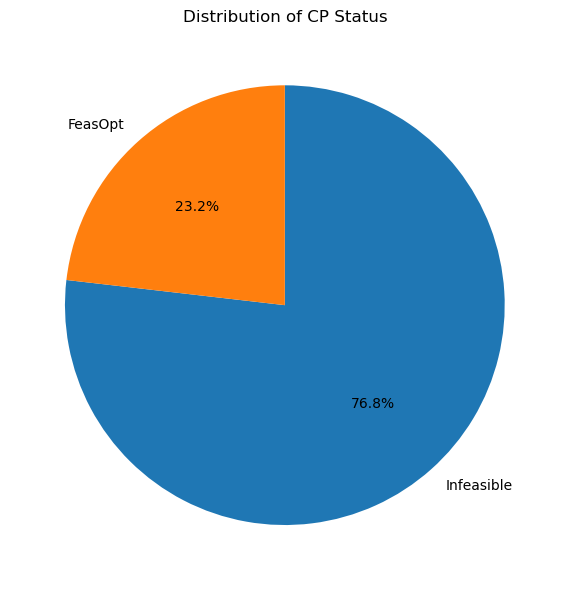

In [3]:
# Pie chart of CP Status distribution
plt.figure(figsize=(8, 6))
info_df['CP Status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title("Distribution of CP Status")
plt.ylabel("")  # Hide y-axis label
plt.tight_layout()
#plt.savefig(r"C:\Users\mahu123a\Documents\160425_Pie_CP_Status.png", dpi=300)  # dpi=300 für hohe Qualität
plt.show()

<Figure size 1000x600 with 0 Axes>

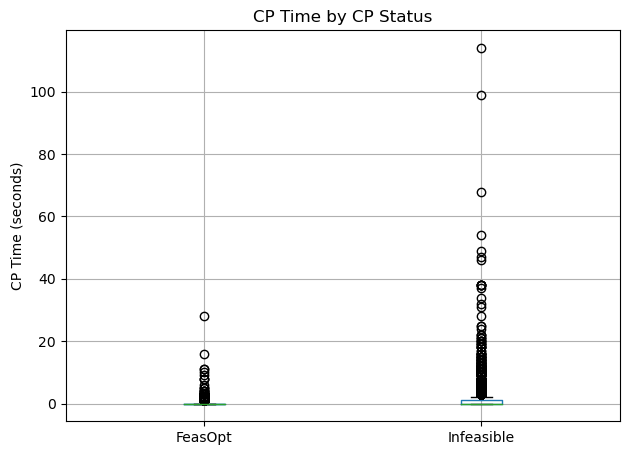

In [20]:
# Plot 1: Box plot of CP Time by CP Status
plt.figure(figsize=(10, 6))
info_df.boxplot(column='CP Time', by='CP Status')
plt.title("CP Time by CP Status")
plt.suptitle("")  # Hide automatic title
plt.ylabel("CP Time (seconds)")
plt.xlabel("")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(os.getcwd(),"Plots_Gendreau_Rand_Tours","CP_Time_GendreauRandToursComplete.png"), dpi=300)  # dpi=300 für hohe Qualität
plt.show()

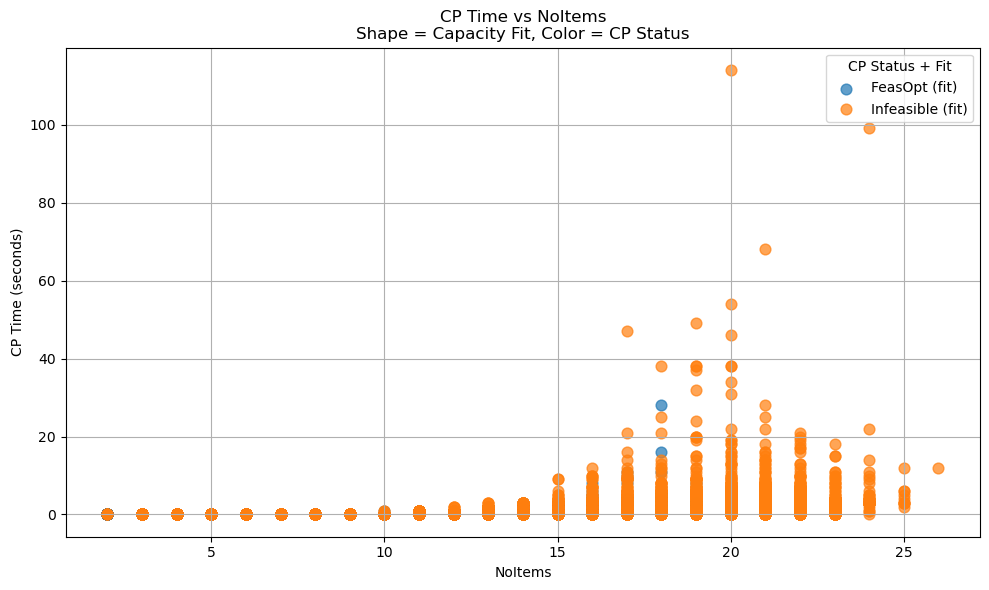

In [4]:
plt.figure(figsize=(10, 6))
statuses = info_df['CP Status'].unique()

for status in statuses:
    subset = info_df[info_df['CP Status'] == status]

    # Plot within capacity (circle)
    plt.scatter(
        subset['NoItems'], subset['CP Time'],
        label=f"{status} (fit)", marker='o', s=60, alpha=0.7
    )

plt.title("CP Time vs NoItems\nShape = Capacity Fit, Color = CP Status")
plt.xlabel("NoItems")
plt.ylabel("CP Time (seconds)")
plt.legend(title="CP Status + Fit")
plt.grid(True)
plt.tight_layout()
#plt.savefig(os.path.join(os.getcwd(),"Plots_Gendreau_Rand_Tours","CP_Time_GendreauRandToursComplete.png"), dpi=300)  # dpi=300
plt.show()


C:\Users\mahu123a\AppData\Local\Temp\6\ipykernel_27008\602483775.py:30: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\mahu123a\AppData\Local\Temp\6\ipykernel_27008\602483775.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(os.path.join(os.getcwd(),"Plots_Gendreau_Rand_Tours","RelVolumeWeight_GendreauRandToursComplete.png"), dpi=300)  # dpi=300


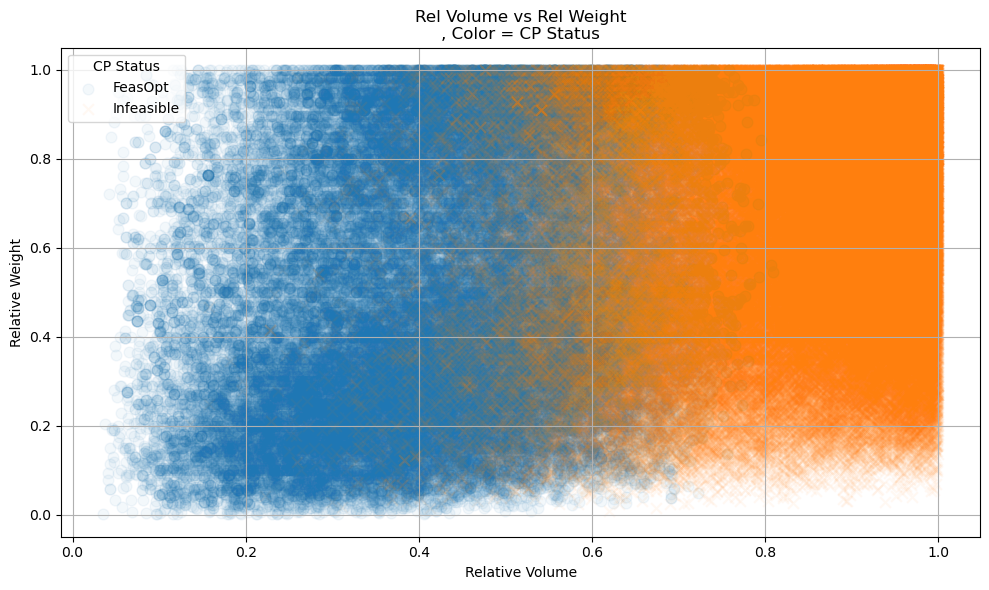

In [17]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

plt.figure(figsize=(10, 6))

marker_map = {
    "FeasOpt": "o",
    "Infeasible" : "x"
}


# Loop through each CP Status
for i, status in enumerate(statuses):
    df_status = info_df[info_df['CP Status'] == status]
    
    # Plot with alpha
    plt.scatter(
        df_status['Rel Volume'], df_status['Rel Weight'],
        label=f"{status}", marker=marker_map[status], s=60,
        alpha=0.05
    )



plt.title("Rel Volume vs Rel Weight\n, Color = CP Status")
plt.xlabel("Relative Volume")
plt.ylabel("Relative Weight")
plt.grid(True)
plt.legend(title="CP Status")
plt.tight_layout()
plt.savefig(os.path.join(os.getcwd(),"Plots_Gendreau_Rand_Tours","RelVolumeWeight_GendreauRandToursComplete.png"), dpi=300)  # dpi=300
plt.show()

# Speichern als PNG


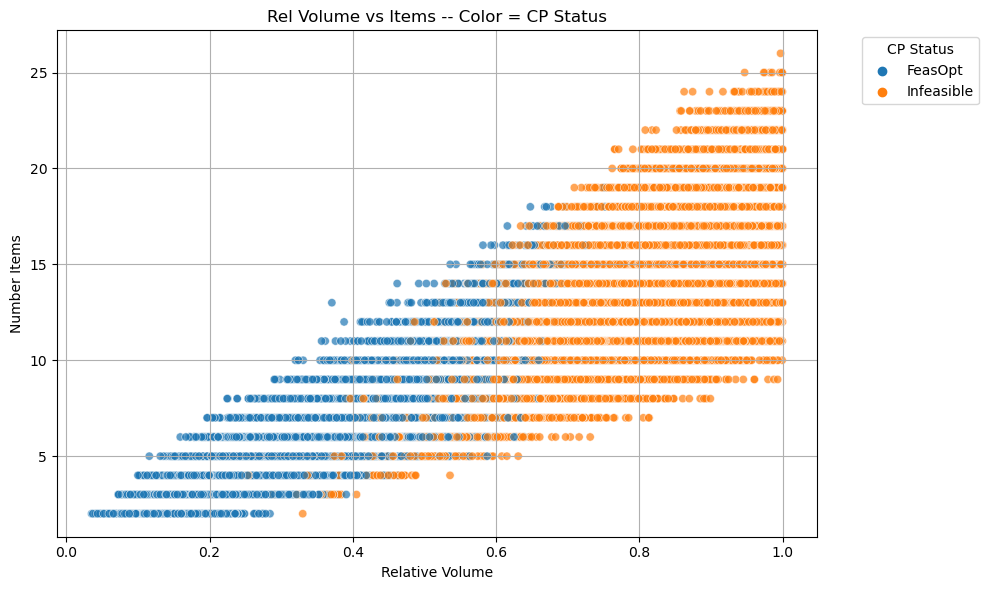

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))


sns.scatterplot(
    x=info_df['Rel Volume'],
    y=info_df['NoItems'],
    hue=info_df['CP Status'],
    marker='o',
    alpha=0.7
)

plt.title("Rel Volume vs Items -- Color = CP Status")
plt.xlabel("Relative Volume")
plt.ylabel("Number Items")
plt.grid(True)
plt.legend(title="CP Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
#plt.savefig(r"C:\Users\mahu123a\Documents\110625_Rel_Vol_Items_CP_Status.png", dpi=300)
plt.show()


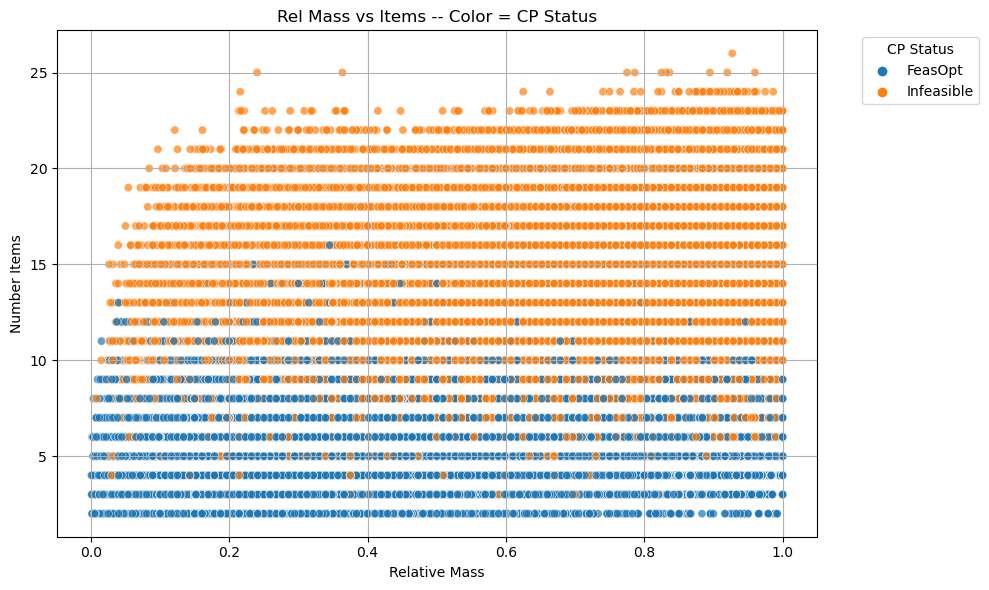

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))


sns.scatterplot(
    x=info_df['Rel Weight'],
    y=info_df['NoItems'],
    hue=info_df['CP Status'],
    marker='o',
    alpha=0.7
)

plt.title("Rel Mass vs Items -- Color = CP Status")
plt.xlabel("Relative Mass")
plt.ylabel("Number Items")
plt.grid(True)
plt.legend(title="CP Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(r"C:\Users\mahu123a\Documents\110625_Rel_Mass_Items_CP_Status.png", dpi=300)
plt.show()
